<a href="https://colab.research.google.com/github/sergioo-herreraa/Collaborative-Filtering-via-Gaussian-Mixtures/blob/main/Collaborative_Filtering_via_Gaussian_Mixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/sergioo-herreraa/Collaborative-Filtering-via-Gaussian-Mixtures

Cloning into 'Collaborative-Filtering-via-Gaussian-Mixtures'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 71 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (71/71), 1.06 MiB | 1.88 MiB/s, done.
Resolving deltas: 100% (38/38), done.


##K-means

K-means for K=1, seed=0, cost=5462.297452340002


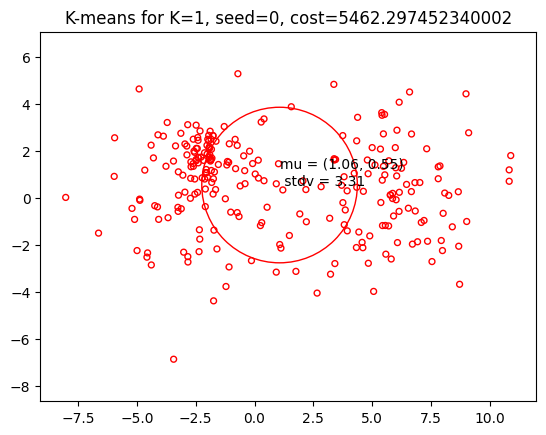

K-means for K=2, seed=0, cost=1684.9079502962372


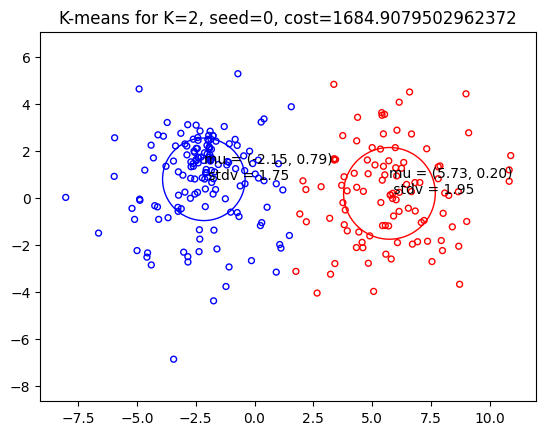

K-means for K=3, seed=3, cost=1329.59486715443


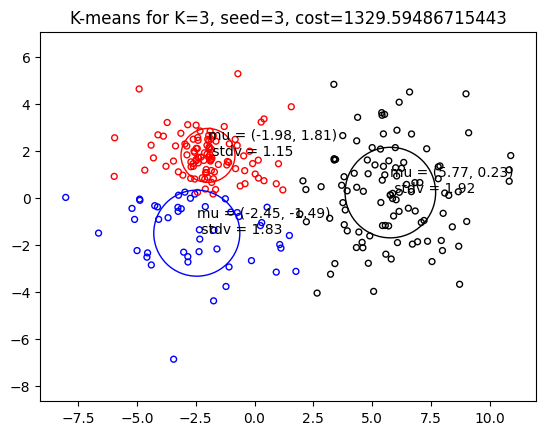

K-means for K=4, seed=4, cost=1035.499826539466


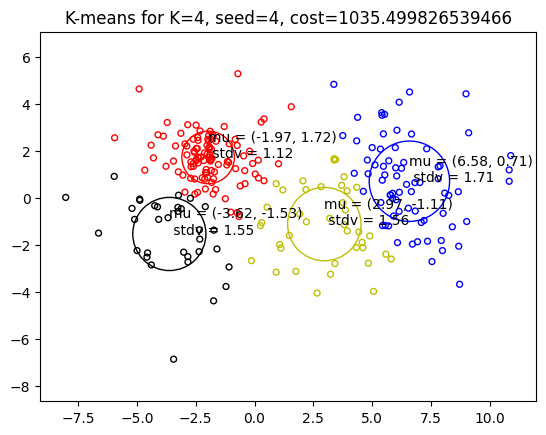

In [ ]:
import sys
sys.path.append("/content/Collaborative-Filtering-via-Gaussian-Mixtures")
from common import GaussianMixture
import numpy as np
import kmeans
import common
import naive_em
import em

X = np.loadtxt("/content/Collaborative-Filtering-via-Gaussian-Mixtures/toy_data.txt")

def run_kmeans():
    for K in range(1, 5):
        min_cost = None
        best_seed = None
        for seed in range(0, 5):
            mixture, post = common.init(X, K, seed)
            mixture, post, cost = kmeans.run(X, mixture, post)
            if min_cost is None or cost < min_cost:
                min_cost = cost
                best_seed = seed

        mixture, post = common.init(X, K, best_seed)
        mixture, post, cost = kmeans.run(X, mixture, post)
        title = f"K-means for K={K}, seed={best_seed}, cost={cost}"
        print(title)
        common.plot(X, mixture, post, title)

run_kmeans()

##Expectation Maximization Algorithm and Bayesian Information Criterion



EM for K=1, seed=0, ll=-1307.2234317600937, bic=-1315.5056231368872


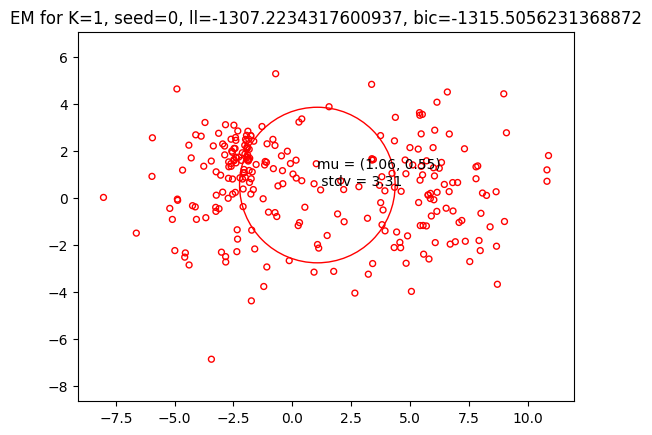

EM for K=2, seed=2, ll=-1175.7146293666792, bic=-1195.039742579197


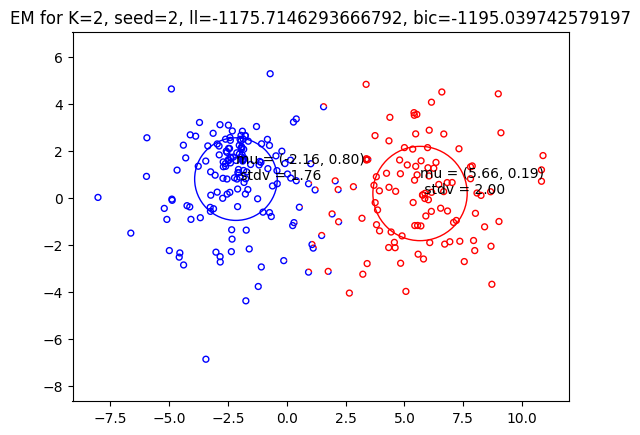

EM for K=3, seed=0, ll=-1138.8908996872674, bic=-1169.2589347355097


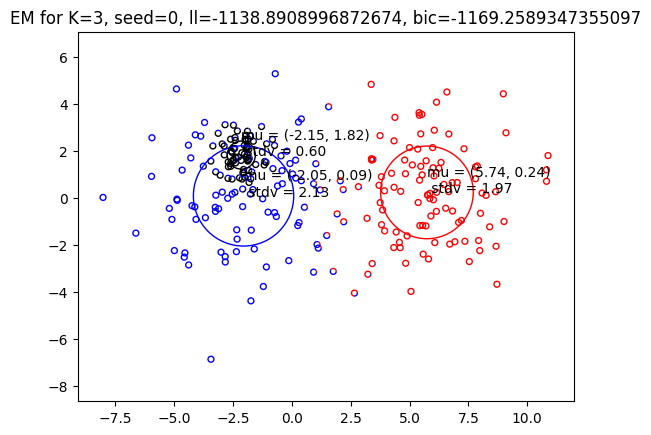

EM for K=4, seed=4, ll=-1138.601175699485, bic=-1180.012132583452


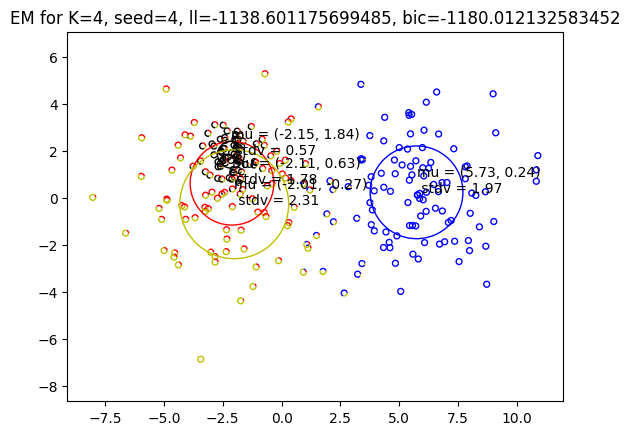

In [ ]:
def run_with_bic():
    max_bic = None
    for K in range(1, 5):
        max_ll = None
        best_seed = None
        for seed in range(0, 5):
            mixture, post = common.init(X, K, seed)
            mixture, post, ll = naive_em.run(X, mixture, post)
            if max_ll is None or ll > max_ll:
                max_ll = ll
                best_seed = seed

        mixture, post = common.init(X, K, best_seed)
        mixture, post, ll = naive_em.run(X, mixture, post)
        bic = common.bic(X, mixture, ll)
        if max_bic is None or bic > max_bic:
            max_bic = bic
        title = f"EM for K={K}, seed={best_seed}, ll={ll}, bic={bic}"
        print(title)
        common.plot(X, mixture, post, title)

run_with_bic()

##Using the mixture model for collaborative filtering

In [ ]:
X=np.loadtxt("/content/Collaborative-Filtering-via-Gaussian-Mixtures/netflix_incomplete.txt")

def run_matrix_completion():
    max_bic = None
    for K in range(1, 13):
        max_ll = None
        best_seed = None
        for seed in range(0, 5):
            mixture, post = common.init(X, K, seed)
            mixture, post, ll = em.run(X, mixture, post)
            if max_ll is None or ll > max_ll:
                max_ll = ll
                best_seed = seed

        mixture, post = common.init(X, K, best_seed)
        mixture, post, ll = em.run(X, mixture, post)
        bic = common.bic(X, mixture, ll)
        if max_bic is None or bic > max_bic:
            max_bic = bic
        title = f"EM for K={K}, seed={best_seed}, ll={ll}, bic={bic}"
        print(title)

run_matrix_completion()

EM for K=1, seed=0, ll=-1521060.9539852454, bic=-1525318.545125129
EM for K=2, seed=1, ll=-1451240.8471468915, bic=-1459759.5744650764
EM for K=3, seed=3, ll=-1450442.8251735808, bic=-1463222.6886700671
EM for K=4, seed=3, ll=-1424494.4260985411, bic=-1441535.4257733289
EM for K=5, seed=3, ll=-1423370.9815602289, bic=-1444673.117413318
EM for K=6, seed=1, ll=-1404966.5989303878, bic=-1430529.8709617786
EM for K=7, seed=4, ll=-1404065.2594058353, bic=-1433889.6676155275
EM for K=8, seed=3, ll=-1403139.948553871, bic=-1437225.4929418645
EM for K=9, seed=4, ll=-1391854.3985444335, bic=-1430201.0791107286
EM for K=10, seed=3, ll=-1401509.650417268, bic=-1444117.4671618645
EM for K=11, seed=3, ll=-1394638.9922548137, bic=-1441507.9451777115
EM for K=12, seed=1, ll=-1390234.422346942, bic=-1441364.5114481412


In [ ]:
K=12
seed=1
mixture, post = common.init(X, K, seed)
mixture, post, ll = em.run(X, mixture, post)
X=em.fill_matrix(X, mixture)
X_gold=np.loadtxt("/content/Collaborative-Filtering-via-Gaussian-Mixtures/netflix_complete.txt")

print(common.rmse(X, X_gold))

0.48049085054006835
